# **PYTHON ASSIGNMENT 3** 

* Nama : Dharmayuda Febrianto
* PYTN-KS16-012

## Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import graphviz
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings

warnings.filterwarnings('ignore')

## Load Dataset
### Knowing the dataset

In [7]:
df = pd.read_csv('bank.csv', delimiter=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [18]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0
4520,44,entrepreneur,single,tertiary,0,1136,1,1,cellular,3,apr,345,2,249,7,other,0


In [19]:
df.shape

(4521, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Prepocessing

kode ini digunakan untuk mengubah nilai-nilai kategori biner dalam kolom-kolom tertentu menjadi bilangan bulat menggunakan LabelEncoder. Ini dapat berguna saat kita bekerja dengan algoritma pembelajaran mesin yang memerlukan input dalam bentuk numerik, seperti logistic regresion atau beberapa algoritma lainnya

In [9]:
label_encoder = LabelEncoder()

column_binary = ['default', 'housing', 'loan', 'y']
for col in column_binary:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
df.housing

0       0
1       1
2       1
3       1
4       1
       ..
4516    1
4517    1
4518    0
4519    0
4520    1
Name: housing, Length: 4521, dtype: int32

Kode Python di bawah berkaitan dengan pengelolaan kolom-kolom bertipe data objek (object) dalam suatu dataset. Tujuan umumnya adalah untuk mengubah tipe data kolom-kolom ini menjadi tipe data kategori (category), yang dapat memiliki keuntungan dalam pengolahan data dan analisis statistik.

In [12]:
col_object = df.select_dtypes(include='object').columns
for col in col_object:
    df[col] = df[col].astype('category')

mengecek ulang Dtype masing masing coloumn setelah dilakukan preprosesing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   int32   
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   int32   
 7   loan       4521 non-null   int32   
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   category
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   int32   
dtypes: category(6), int32(4), int64(7)
memory usage: 345.9 KB


## Logistic Regression

In [16]:
X = df['age'].values.reshape(-1, 1)
y = df['housing']

In [17]:
X.shape

(4521, 1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(x_test)

print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5977900552486188
Confussion Matrix
[[138 260]
 [104 403]]


### Visualization Model

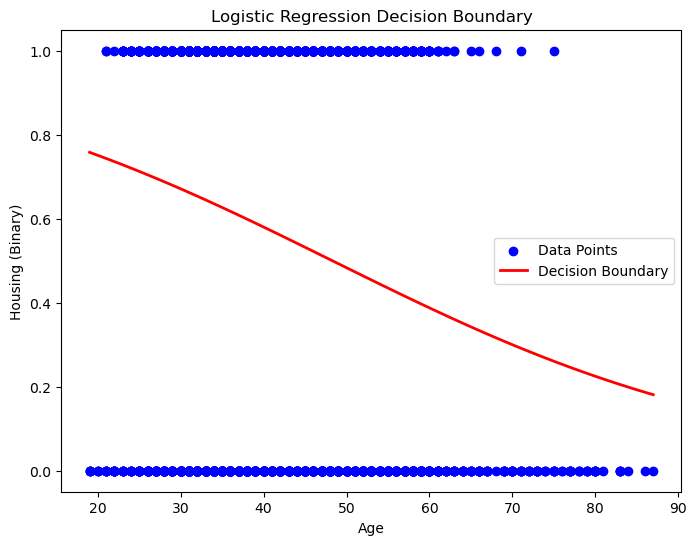

In [23]:
# Membuat visualisasi scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Menghasilkan titik-titik pada sumbu x untuk membuat garis keputusan
x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)

# Menghitung nilai y menggunakan model logistic regression
y_values = model.predict_proba(x_values)[:, 1]

# Menambahkan garis keputusan ke plot
plt.plot(x_values, y_values, color='red', linewidth=2, label='Decision Boundary')

# Menambahkan legenda dan label
plt.xlabel('Age')
plt.ylabel('Housing (Binary)')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

## K-Nearest Neighbors Algorithm

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [25]:
predict = knn.predict(x_test)

accuracy =  accuracy_score(y_test, predict)
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.5977900552486188
Confussion Matrix
[[138 260]
 [104 403]]


## Support Vector Machine Algoritma (SVM)

In [26]:
X = df[['age', 'housing', 'loan']]
y = df['y']

In [27]:
svm_model = SVC(kernel='linear', random_state=42)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [30]:
y_pred = svm_model.predict(x_test)

In [31]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8917127071823204
Confussion Matrix
[[807   0]
 [ 98   0]]


## Decission Tree Model

In [32]:
tree_model = DecisionTreeClassifier(criterion='entropy')

clf = tree_model.fit(x_train, y_train)
clf

DecisionTreeClassifier(criterion='entropy')

In [33]:
y_pred = clf.predict(x_test)

In [34]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8883977900552487
Confussion Matrix
[[804   3]
 [ 98   0]]


### Visualizing Decision Tree

In [35]:
feature = ['age', 'housing', 'loan']

dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    class_names=['0','1'],
    feature_names=feature,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)  
graph.view("decision_tree")

'decision_tree.pdf'

## Random Forest Algorithm

In [36]:
randomForest_model = RandomForestClassifier(n_estimators=100)
randomForest_model.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = randomForest_model.predict(x_test)

In [39]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8861878453038674
Confussion Matrix
[[802   5]
 [ 98   0]]


## Naive Bayes Algorithm

In [40]:
naiveBayes_model = GaussianNB()
naiveBayes_model.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred = naiveBayes_model.predict(x_test)

In [42]:
print(f"Accuracy Score = ", accuracy_score(y_test, y_pred))
print(f"Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy Score =  0.8895027624309392
Confussion Matrix
[[801   6]
 [ 94   4]]


## Data Anylisis Visualization

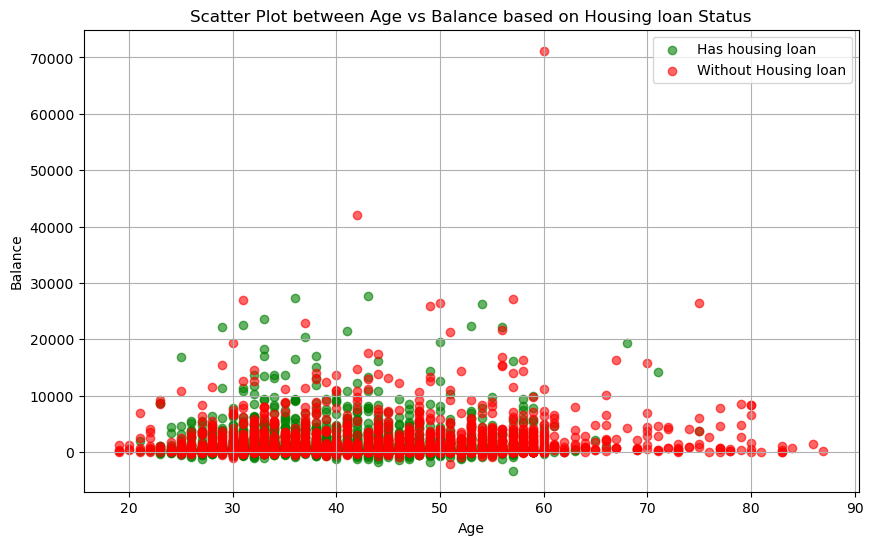

In [46]:
with_housing_loan = df[df['housing'] == 1]
without_housing_loan = df[df['housing'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(with_housing_loan['age'], with_housing_loan['balance'], color='green', label='Has housing loan', alpha=0.6)

plt.scatter(without_housing_loan['age'], without_housing_loan['balance'], color='red', label='Without Housing loan', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot between Age vs Balance based on Housing loan Status')
plt.legend()
plt.grid(True)
plt.show()


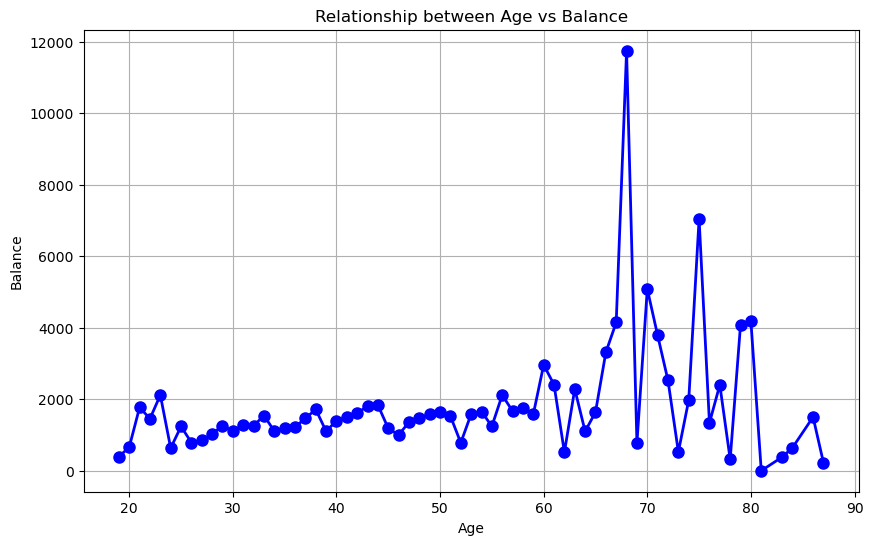

In [45]:
avg_balance = df.groupby('age')['balance'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_balance.index, avg_balance.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Relationship between Age vs Balance')
plt.grid(True)
plt.show()
